<a href="https://colab.research.google.com/github/alperguz/DSA210Project/blob/main/DSAProjectPhase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Phase II — Data Collection & Exploratory Data Analysis (EDA)
In this phase, I collected Premier League player statistics and market value data, cleaned both datasets, merged them, and performed exploratory data analysis to understand relationships between performance metrics and player market values.

In [36]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid")

In [37]:
#Load Data (Transfermarkt CSV)
mv_df = pd.read_csv("plplayersvalues - Sheet1.csv")
mv_df = mv_df.drop(columns=["Unnamed: 3", "Unnamed: 4"])
mv_df.head()

,#,Player,Age,Market value
0,22,David Raya Goalkeeper,29,€40.00m
1,-,Aaron Ramsdale Goalkeeper,27,€16.00m
2,32,Neto Goalkeeper,35,€1.50m
3,-,Jack Porter Goalkeeper,16,€400k
4,-,Alexéi Rojas Goalkeeper,19,€250k


In [47]:
#Load Data (FBref Dataset)
stats_df = pd.read_csv("/kaggle/input/fbref-premier-league-202425-player-stats-dataset/fbref_PL_2024-25.csv")
stats_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Joshua Acheampong,eng ENG,DF,Chelsea,18.0,2006.0,4,2,170,...,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
2,3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,...,0.00,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12
3,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.06,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07
4,5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,...,0.16,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40


In [39]:
#Clean Transfermarkt Data
mv_df["Player"] = mv_df["Player"].astype(str).str.replace(r'^\d+\s*', '', regex=True)
mv_df["Player"] = mv_df["Player"].str.replace(r'^-\s*', '', regex=True)
mv_df["Player"] = mv_df["Player"].str.replace(r'\s+', ' ', regex=True).str.strip()
mv_df["Player"] = mv_df["Player"].apply(lambda x: " ".join(x.split()[:-1]))

def convert_value(val):
    if isinstance(val, str):
        v = val.replace("€","").strip()
        if "m" in v:
            return float(v.replace("m","")) * 1_000_000
        if "k" in v:
            return float(v.replace("k","")) * 1_000
    return None

mv_df["MarketValue_eur"] = mv_df["Market value"].apply(convert_value)
mv_df["player_clean"] = mv_df["Player"].str.lower().str.strip()

mv_df = mv_df[["Player", "Age", "MarketValue_eur", "player_clean"]]
mv_df.head()

,Player,Age,MarketValue_eur,player_clean
0,David Raya,29,40000000.0,david raya
1,Aaron Ramsdale,27,16000000.0,aaron ramsdale
2,Neto,35,1500000.0,neto
3,Jack Porter,16,400000.0,jack porter
4,Alexéi Rojas,19,250000.0,alexéi rojas


In [49]:
#Clean FBref Stats
stats_df["player_clean"] = stats_df["Player"].str.lower().str.strip()
stats_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,player_clean
0,1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,max aarons
1,2,Joshua Acheampong,eng ENG,DF,Chelsea,18.0,2006.0,4,2,170,...,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,joshua acheampong
2,3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,...,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12,tyler adams
3,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07,tosin adarabioyo
4,5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,...,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40,simon adingra


In [50]:
#Merge Both Datasets
merged_df = pd.merge(
    stats_df,
    mv_df[["player_clean", "MarketValue_eur"]],
    on="player_clean",
    how="inner"
)
merged_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,player_clean,MarketValue_eur
0,1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,max aarons,6000000.0
1,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07,tosin adarabioyo,20000000.0
2,6,Emmanuel Agbadou,ci CIV,DF,Wolves,27.0,1997.0,16,16,1410,...,0.06,0.06,0.06,0.05,0.02,0.07,0.05,0.07,emmanuel agbadou,20000000.0
3,8,Ola Aina,ng NGA,DF,Nott'ham Forest,27.0,1996.0,35,35,2995,...,0.09,0.06,0.09,0.02,0.04,0.06,0.02,0.06,ola aina,22000000.0
4,9,Rayan Aït-Nouri,dz ALG,DF,Wolves,23.0,2001.0,37,37,3109,...,0.32,0.12,0.32,0.08,0.16,0.24,0.08,0.24,rayan aït-nouri,35000000.0


# 📚 Collection of Data
This project uses two datasets:

### **1. FBref Premier League Player Statistics**
Contains:
- Goals, assists, minutes played  
- xG, xA  
- Passes, tackles, interceptions  
- Squad, position, playing time  

### **2. Transfermarkt Player Market Values**
Includes:
- Player name  
- Age  
- End-of-season 24/25 market value (converted to numeric EUR)  

Both datasets were cleaned and merged using a lowercase standardized `player_clean` key.

# 🔍 Exploratory Data Analysis (EDA)

Before conducting formal hypothesis testing, an Exploratory Data Analysis (EDA) was performed to examine the structure, distributions, and relationships within the dataset.

The following EDA steps were carried out:
1. Descriptive statistics  
2. Distribution analysis  
3. Visualization of relationships  
4. Correlation analysis  

In [56]:
merged_df.describe(include="all")

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,player_clean,MarketValue_eur
count,262.000000,262,262,262,262,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262,2.620000e+02
unique,NaN,240,50,10,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240,NaN
top,NaN,Joachim Andersen,eng ENG,DF,Crystal Palace,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,joachim andersen,NaN
freq,NaN,4,86,152,21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
mean,284.503817,NaN,NaN,NaN,NaN,25.645038,1997.977099,18.874046,14.870229,1337.061069,...,0.152557,0.088053,0.147481,0.141832,0.060191,0.202137,0.137672,0.197824,NaN,2.052481e+07
std,169.477194,NaN,NaN,NaN,NaN,4.708348,4.691993,12.465561,12.774134,1108.495613,...,0.268198,0.162927,0.259556,0.392796,0.074692,0.411534,0.390047,0.407813,NaN,2.012371e+07
min,1.000000,NaN,NaN,NaN,NaN,16.000000,1985.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000e+05
25%,133.750000,NaN,NaN,NaN,NaN,22.000000,1995.000000,7.000000,2.250000,315.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,NaN,6.000000e+06
50%,285.500000,NaN,NaN,NaN,NaN,25.500000,1998.000000,18.000000,11.000000,1061.500000,...,0.030000,0.000000,0.030000,0.040000,0.030000,0.090000,0.040000,0.090000,NaN,1.800000e+07
75%,434.750000,NaN,NaN,NaN,NaN,29.000000,2001.000000,30.000000,26.750000,2343.250000,...,0.200000,0.090000,0.200000,0.097500,0.100000,0.220000,0.097500,0.217500,NaN,2.950000e+07


## 1. Distribution Analysis

To understand how variables such as market value, goals, assists, and minutes played are distributed across Premier League players, distribution plots were generated.

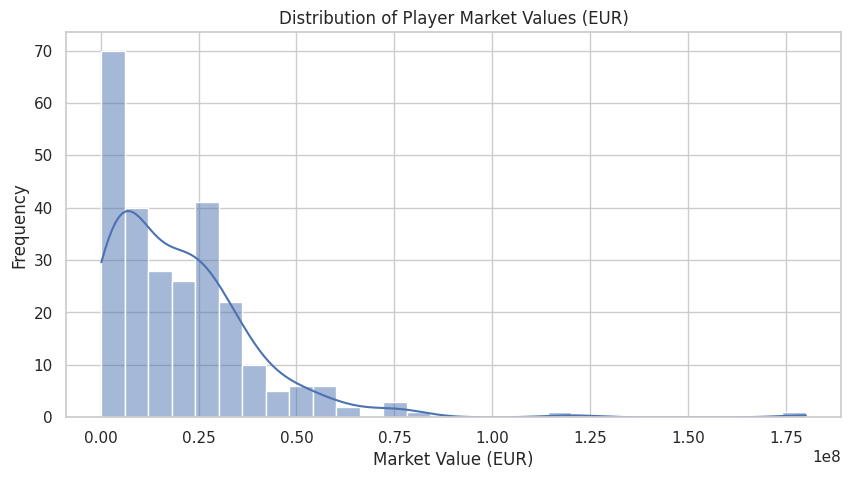

In [57]:
#Distribution of Market Values
plt.figure(figsize=(10,5))
sns.histplot(merged_df["MarketValue_eur"], bins=30, kde=True)
plt.title("Distribution of Player Market Values (EUR)")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Frequency")
plt.show()

## 2. Visualization

Scatter plots were generated to visually inspect the relationships between player performance metrics and market value.

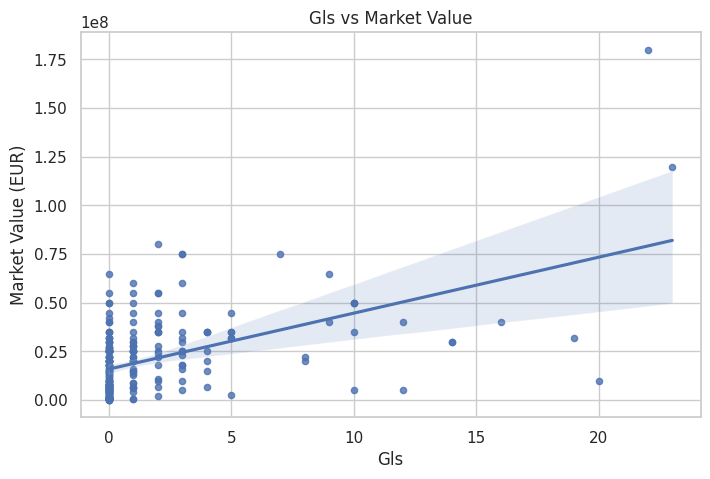

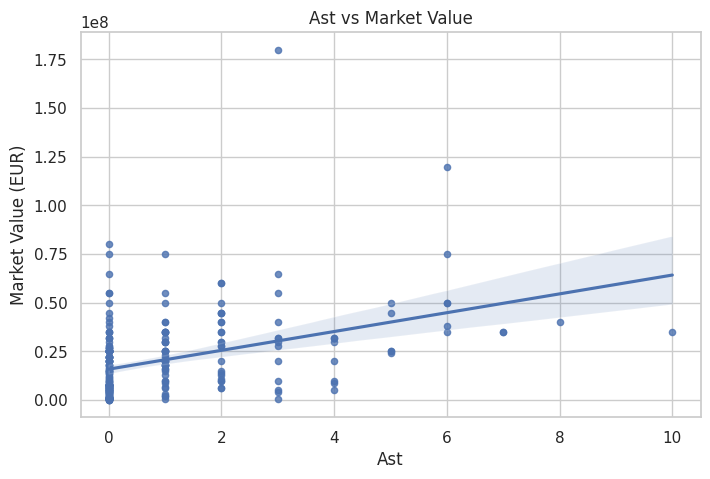

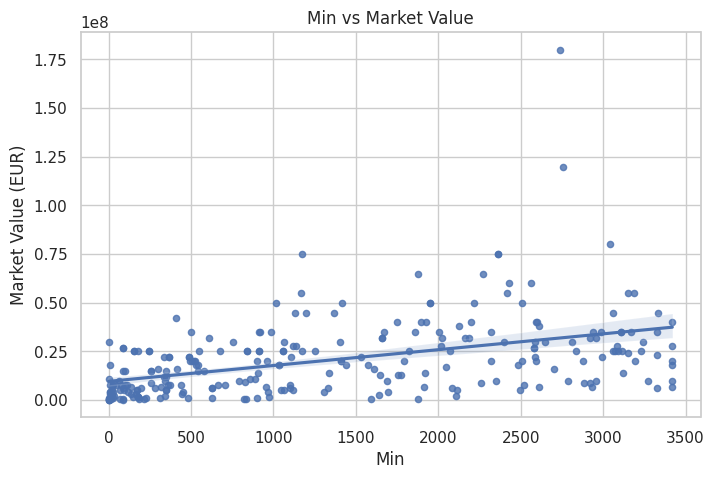

In [58]:
#Scatter Plots
features = ["Gls", "Ast", "Min"]

for col in features:
    plt.figure(figsize=(8,5))
    sns.regplot(data=merged_df, x=col, y="MarketValue_eur", scatter_kws={"s":20})
    plt.title(f"{col} vs Market Value")
    plt.xlabel(col)
    plt.ylabel("Market Value (EUR)")
    plt.show()

## 3. Correlation Analysis

Correlation coefficients were calculated to assess the linear relationships between key performance metrics and market value. A correlation heatmap was created for visualization.

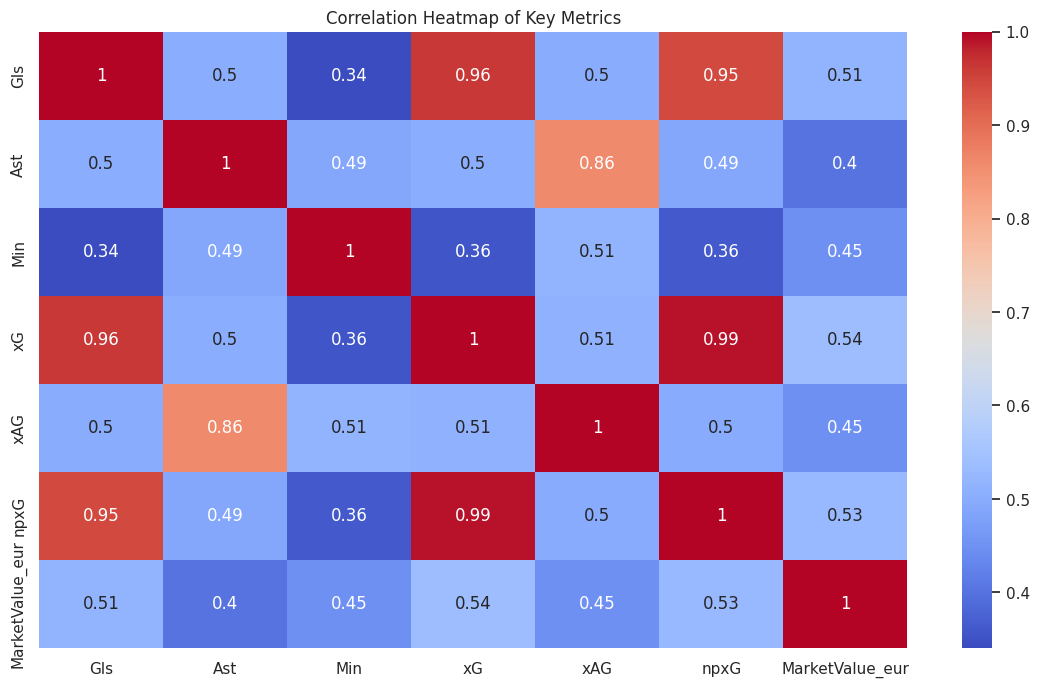

In [59]:
#Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(merged_df[["Gls", "Ast", "Min", "xG", "xAG", "npxG", "MarketValue_eur"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

# 🧪 Hypothesis Testing

### **Null Hypothesis (H₀):**
There is no statistically significant relationship between Premier League player performance metrics and market value.

### **Alternative Hypothesis (H₁):**
There is a statistically significant relationship between performance metrics and market value.

The significance level used was α = 0.05.

In [60]:
#Hypothesis Test Code
# Test normality
mv = merged_df["MarketValue_eur"]
goals = merged_df["Gls"]

mv_normal = stats.shapiro(mv).pvalue
goals_normal = stats.shapiro(goals).pvalue

# Choose test based on normality
if mv_normal > 0.05 and goals_normal > 0.05:
    corr_test = stats.pearsonr(mv, goals)
    test_used = "Pearson"
else:
    corr_test = stats.spearmanr(mv, goals)
    test_used = "Spearman"

# Results
print("===== Hypothesis Test =====")
print(f"Test Used: {test_used}")
print(f"Correlation: {corr_test.correlation:.4f}")
print(f"P-value: {corr_test.pvalue:.4f}")

# Decision
alpha = 0.05
if corr_test.pvalue < alpha:
    print("➡ Reject H₀: Significant relationship found.")
else:
    print("➡ Fail to reject H₀: No significant relationship.")

===== Hypothesis Test =====
Test Used: Spearman
Correlation: 0.4757
P-value: 0.0000
➡ Reject H₀: Significant relationship found.
